In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# NOTE: We are using 'data' as ame for  dataframe for visualization and we are using df_final as a name for dataframe for modeling and predicting

#DATALOADING

In [135]:
df = pd.read_csv("NYPD.csv")

In [136]:
df.head()
display(df.head(10))

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,269235387,42.0,BRONX,06/03/2023,01:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,BLACK HISPANIC,M,1011982.0,239520.0,40.824059,-73.899799,"(40.82405906, -73.89979939)",POINT (-73.89979939 40.82405906)
1,262102261,43.0,BRONX,01/18/2023,14:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1019635.0,243829.0,40.835859,-73.872125,"(40.83585867, -73.87212505)",POINT (-73.87212505 40.83585867)
2,267972239,43.0,BRONX,05/07/2023,00:15:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,1022051.0,242244.0,40.831500,-73.863400,"(40.8315, -73.8634)",POINT (-73.8634 40.8315)
3,263141402H1,NaN,BROOKLYN,02/06/2023,10:16:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,18-24,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN
4,269307857H1,NaN,BROOKLYN,06/04/2023,00:20:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN
5,277525074H3,NaN,QUEENS,11/14/2023,07:05:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,45-64,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN
6,277525074H1,NaN,QUEENS,11/14/2023,07:05:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,45-64,BLACK,F,NaN,NaN,NaN,NaN,NaN,NaN
7,271421229H1,NaN,BROOKLYN,07/05/2020,21:45:00,NaN,(null),COMPLETED,NOSTRAND,1696.0,...,NaN,25-44,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN
8,270206142H1,NaN,MANHATTAN,06/21/2023,16:25:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN
9,278972931,123.0,STATEN ISLAND,12/14/2023,02:50:00,12/14/2023,02:52:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,934105.0,138444.0,40.546531,-74.180430,"(40.54653060020265, -74.18043031626128)",POINT (-74.18043031626128 40.54653060020265)


In [137]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')

In [138]:
df.isnull().sum()

CMPLNT_NUM                       0
ADDR_PCT_CD                     70
BORO_NM                          0
CMPLNT_FR_DT                     0
CMPLNT_FR_TM                     0
CMPLNT_TO_DT                 34738
CMPLNT_TO_TM                     0
CRM_ATPT_CPTD_CD                 0
HADEVELOPT                       0
HOUSING_PSA                 519092
JURISDICTION_CODE                0
JURIS_DESC                       0
KY_CD                            0
LAW_CAT_CD                       0
LOC_OF_OCCUR_DESC                0
OFNS_DESC                        0
PARKS_NM                         0
PATROL_BORO                      0
PD_CD                          386
PD_DESC                          0
PREM_TYP_DESC                    0
RPT_DT                           0
STATION_NAME                     0
SUSP_AGE_GROUP                   0
SUSP_RACE                        0
SUSP_SEX                         0
TRANSIT_DISTRICT            540384
VIC_AGE_GROUP                    0
VIC_RACE            

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555117 entries, 0 to 555116
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                555117 non-null  object 
 1   ADDR_PCT_CD               555047 non-null  float64
 2   BORO_NM                   555117 non-null  object 
 3   CMPLNT_FR_DT              555117 non-null  object 
 4   CMPLNT_FR_TM              555117 non-null  object 
 5   CMPLNT_TO_DT              520379 non-null  object 
 6   CMPLNT_TO_TM              555117 non-null  object 
 7   CRM_ATPT_CPTD_CD          555117 non-null  object 
 8   HADEVELOPT                555117 non-null  object 
 9   HOUSING_PSA               36025 non-null   float64
 10  JURISDICTION_CODE         555117 non-null  int64  
 11  JURIS_DESC                555117 non-null  object 
 12  KY_CD                     555117 non-null  int64  
 13  LAW_CAT_CD                555117 non-null  o

# DATA CLEANING

In [140]:
df.drop(columns=['HOUSING_PSA','TRANSIT_DISTRICT'],inplace=True)
# The below all are internal classification and the columsn vals exist in other columns
df.drop(columns=['KY_CD','PD_DESC','PD_CD'],inplace=True)

In [141]:
df['ADDR_PCT_CD']= df['ADDR_PCT_CD'].fillna(df.ADDR_PCT_CD.median())

In [142]:
# We have no use for
df.drop(columns=['X_COORD_CD','Y_COORD_CD','Lat_Lon','New Georeferenced Column'],inplace=True)

In [143]:
# dropping nulls
df.dropna(inplace= True)

In [144]:
df.shape

(520379, 27)

In [145]:
# we have total nulls below
df.drop(columns=['PARKS_NM','HADEVELOPT','STATION_NAME'],inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520379 entries, 9 to 555116
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         520379 non-null  object 
 1   ADDR_PCT_CD        520379 non-null  float64
 2   BORO_NM            520379 non-null  object 
 3   CMPLNT_FR_DT       520379 non-null  object 
 4   CMPLNT_FR_TM       520379 non-null  object 
 5   CMPLNT_TO_DT       520379 non-null  object 
 6   CMPLNT_TO_TM       520379 non-null  object 
 7   CRM_ATPT_CPTD_CD   520379 non-null  object 
 8   JURISDICTION_CODE  520379 non-null  int64  
 9   JURIS_DESC         520379 non-null  object 
 10  LAW_CAT_CD         520379 non-null  object 
 11  LOC_OF_OCCUR_DESC  520379 non-null  object 
 12  OFNS_DESC          520379 non-null  object 
 13  PATROL_BORO        520379 non-null  object 
 14  PREM_TYP_DESC      520379 non-null  object 
 15  RPT_DT             520379 non-null  object 
 16  SUSP_AG

In [147]:
#converting to datetime
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')
df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], errors='coerce')
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'], errors='coerce')
df['CMPLNT_TO_TM'] = pd.to_datetime(df['CMPLNT_TO_TM'], errors='coerce')

<ipython-input-147-b1ca1df5cea0>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], errors='coerce')
<ipython-input-147-b1ca1df5cea0>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CMPLNT_TO_TM'] = pd.to_datetime(df['CMPLNT_TO_TM'], errors='coerce')


In [148]:
df1 =df.copy()
df1['duration'] = df['CMPLNT_TO_DT']-df['CMPLNT_FR_DT']

In [149]:
df1['duration'].unique()

<TimedeltaArray>
[    '0 days',     '1 days',     '2 days',   '305 days',     '9 days',
    '19 days',    '10 days',     '4 days',   '160 days',    '25 days',
 ...
  '1983 days', '10081 days',  '1117 days',  '1026 days',  '1896 days',
  '3942 days',   '818 days',  '1499 days',   '876 days',  '1158 days']
Length: 1256, dtype: timedelta64[ns]

In [150]:
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,PREM_TYP_DESC,RPT_DT,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude
9,278972931,123.0,STATEN ISLAND,2023-12-14,2024-05-02 02:50:00,2023-12-14,2024-05-02 02:52:00,COMPLETED,0,N.Y. POLICE DEPT,...,STREET,12/14/2023,25-44,WHITE,M,UNKNOWN,UNKNOWN,E,40.546531,-74.180430
10,278470767,121.0,STATEN ISLAND,2023-12-04,2024-05-02 15:53:00,2023-12-04,2024-05-02 16:00:00,COMPLETED,0,N.Y. POLICE DEPT,...,STREET,12/04/2023,UNKNOWN,BLACK,M,25-44,BLACK,F,40.626742,-74.139049
11,262794218,123.0,STATEN ISLAND,2023-02-01,2024-05-02 01:35:00,2023-02-01,2024-05-02 01:40:00,COMPLETED,0,N.Y. POLICE DEPT,...,RESIDENCE-HOUSE,02/01/2023,25-44,BLACK,F,45-64,UNKNOWN,M,40.547045,-74.220517
13,266228476,123.0,STATEN ISLAND,2023-04-02,2024-05-02 00:20:00,2023-04-02,2024-05-02 00:25:00,COMPLETED,0,N.Y. POLICE DEPT,...,BAR/NIGHT CLUB,04/05/2023,UNKNOWN,WHITE,U,45-64,WHITE,M,40.514779,-74.248458
14,262909178,121.0,STATEN ISLAND,2023-02-02,2024-05-02 12:05:00,2023-02-02,2024-05-02 12:10:00,COMPLETED,0,N.Y. POLICE DEPT,...,SOCIAL CLUB/POLICY,02/02/2023,25-44,BLACK,M,45-64,WHITE,M,40.634491,-74.131551


In [151]:
df['days_duration']= df1['duration']

In [152]:
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,RPT_DT,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,days_duration
9,278972931,123.0,STATEN ISLAND,2023-12-14,2024-05-02 02:50:00,2023-12-14,2024-05-02 02:52:00,COMPLETED,0,N.Y. POLICE DEPT,...,12/14/2023,25-44,WHITE,M,UNKNOWN,UNKNOWN,E,40.546531,-74.180430,0 days
10,278470767,121.0,STATEN ISLAND,2023-12-04,2024-05-02 15:53:00,2023-12-04,2024-05-02 16:00:00,COMPLETED,0,N.Y. POLICE DEPT,...,12/04/2023,UNKNOWN,BLACK,M,25-44,BLACK,F,40.626742,-74.139049,0 days
11,262794218,123.0,STATEN ISLAND,2023-02-01,2024-05-02 01:35:00,2023-02-01,2024-05-02 01:40:00,COMPLETED,0,N.Y. POLICE DEPT,...,02/01/2023,25-44,BLACK,F,45-64,UNKNOWN,M,40.547045,-74.220517,0 days
13,266228476,123.0,STATEN ISLAND,2023-04-02,2024-05-02 00:20:00,2023-04-02,2024-05-02 00:25:00,COMPLETED,0,N.Y. POLICE DEPT,...,04/05/2023,UNKNOWN,WHITE,U,45-64,WHITE,M,40.514779,-74.248458,0 days
14,262909178,121.0,STATEN ISLAND,2023-02-02,2024-05-02 12:05:00,2023-02-02,2024-05-02 12:10:00,COMPLETED,0,N.Y. POLICE DEPT,...,02/02/2023,25-44,BLACK,M,45-64,WHITE,M,40.634491,-74.131551,0 days


In [153]:
df['month'] = df['CMPLNT_FR_DT'].dt.month
df['day'] = df['CMPLNT_FR_DT'].dt.day
df['hour'] = df['CMPLNT_FR_TM'].dt.hour
# add week day column
df['weekday'] = pd.to_datetime(df['CMPLNT_FR_DT']).dt.day_name()

In [154]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE',
       'JURIS_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PATROL_BORO', 'PREM_TYP_DESC', 'RPT_DT', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Latitude',
       'Longitude', 'days_duration', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [155]:

df.BORO_NM.value_counts()

BORO_NM
BROOKLYN         149036
MANHATTAN        128305
QUEENS           117964
BRONX            101423
STATEN ISLAND     23327
(null)              324
Name: count, dtype: int64

In [156]:
df.shape

(520379, 29)

In [157]:
df.dropna(inplace=True)

In [158]:
df.shape

(520147, 29)

In [159]:
df.BORO_NM.mode()

0    BROOKLYN
Name: BORO_NM, dtype: object

In [160]:
df.loc[df['BORO_NM']=='(null)','BORO_NM']='BROOKLYN'

In [161]:
df.BORO_NM.value_counts()

BORO_NM
BROOKLYN         149301
MANHATTAN        128247
QUEENS           117911
BRONX            101366
STATEN ISLAND     23322
Name: count, dtype: int64

In [162]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE',
       'JURIS_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PATROL_BORO', 'PREM_TYP_DESC', 'RPT_DT', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Latitude',
       'Longitude', 'days_duration', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [163]:
df['CRM_ATPT_CPTD_CD'].value_counts()

CRM_ATPT_CPTD_CD
COMPLETED    512628
ATTEMPTED      7519
Name: count, dtype: int64

In [164]:
df.isnull().sum()

CMPLNT_NUM           0
ADDR_PCT_CD          0
BORO_NM              0
CMPLNT_FR_DT         0
CMPLNT_FR_TM         0
CMPLNT_TO_DT         0
CMPLNT_TO_TM         0
CRM_ATPT_CPTD_CD     0
JURISDICTION_CODE    0
JURIS_DESC           0
LAW_CAT_CD           0
LOC_OF_OCCUR_DESC    0
OFNS_DESC            0
PATROL_BORO          0
PREM_TYP_DESC        0
RPT_DT               0
SUSP_AGE_GROUP       0
SUSP_RACE            0
SUSP_SEX             0
VIC_AGE_GROUP        0
VIC_RACE             0
VIC_SEX              0
Latitude             0
Longitude            0
days_duration        0
month                0
day                  0
hour                 0
weekday              0
dtype: int64

In [165]:
df.OFNS_DESC.mode()[0]

'PETIT LARCENY'

In [166]:

df.loc[df['OFNS_DESC']=='(null)','OFNS_DESC']=df.OFNS_DESC.mode()[0]

In [167]:
df.shape

(520147, 29)

In [168]:
df['PREM_TYP_DESC'].value_counts()['(null)']

20098

In [169]:
df.loc[df['PREM_TYP_DESC']=='(null)','PREM_TYP_DESC']=np.nan

In [170]:
df.shape

(520147, 29)

In [171]:
df.dropna(inplace= True)

In [172]:
df['LOC_OF_OCCUR_DESC'].value_counts()

LOC_OF_OCCUR_DESC
INSIDE         261343
FRONT OF       124286
(null)          96963
OPPOSITE OF      9810
REAR OF          7647
Name: count, dtype: int64

In [173]:
df.shape

(500049, 29)

In [174]:
df.loc[df['LOC_OF_OCCUR_DESC']=='(null)','LOC_OF_OCCUR_DESC']=np.nan

In [175]:
df.dropna(inplace= True)


In [176]:
df.shape

(403086, 29)

In [177]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE',
       'JURIS_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PATROL_BORO', 'PREM_TYP_DESC', 'RPT_DT', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Latitude',
       'Longitude', 'days_duration', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [178]:
df['SUSP_AGE_GROUP'].value_counts()

SUSP_AGE_GROUP
UNKNOWN    167246
25-44      108481
(null)      49390
45-64       38625
18-24       26262
<18          8300
65+          4727
1022           21
1023           12
2023            8
-956            1
-953            1
953             1
-62             1
-951            1
-963            1
938             1
-2              1
964             1
942             1
-47             1
-976            1
-1              1
933             1
Name: count, dtype: int64

In [179]:
df['SUSP_RACE'].value_counts()

SUSP_RACE
BLACK                             120449
UNKNOWN                           113524
WHITE HISPANIC                     57082
(null)                             49390
WHITE                              31197
BLACK HISPANIC                     17645
ASIAN / PACIFIC ISLANDER           12922
AMERICAN INDIAN/ALASKAN NATIVE       877
Name: count, dtype: int64

In [180]:
df['SUSP_SEX'].value_counts()

SUSP_SEX
M         198561
U          93839
F          61296
(null)     49390
Name: count, dtype: int64

In [181]:
df['VIC_RACE'].value_counts()

VIC_RACE
UNKNOWN                           112638
BLACK                             102929
WHITE HISPANIC                     74424
WHITE                              60158
ASIAN / PACIFIC ISLANDER           33189
BLACK HISPANIC                     17899
AMERICAN INDIAN/ALASKAN NATIVE      1849
Name: count, dtype: int64

In [182]:
df['VIC_SEX'].value_counts()

VIC_SEX
F    166467
M    139616
D     77049
E     18036
L      1918
Name: count, dtype: int64

In [183]:
# CONVERTING THE NULLS INTO UNKNOWN

df.loc[df['SUSP_AGE_GROUP']=='(null)','SUSP_AGE_GROUP']='UNKNOWN'

In [184]:
df.loc[df['SUSP_RACE']=='(null)','SUSP_RACE']='UNKNOWN'

In [185]:

df.loc[df['SUSP_SEX']=='(null)','SUSP_SEX']='UNKNOWN'

In [186]:
# Assign the new group
#df_pca = df[['SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX', 'VIC_AGE_GROUP','VIC_RACE','VIC_SEX']]
#df_pca.head()

In [187]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE',
       'JURIS_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PATROL_BORO', 'PREM_TYP_DESC', 'RPT_DT', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Latitude',
       'Longitude', 'days_duration', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

# EXPLORING AND VISUALIZATION

In [188]:
#Exploring  Data analysis

In [189]:
data = df.copy()

In [190]:
data.OFNS_DESC.value_counts().iloc[:12]

OFNS_DESC
PETIT LARCENY                     91196
HARRASSMENT 2                     67319
ASSAULT 3 & RELATED OFFENSES      42978
GRAND LARCENY                     41057
CRIMINAL MISCHIEF & RELATED OF    30850
FELONY ASSAULT                    20907
OFF. AGNST PUB ORD SENSBLTY &     14922
MISCELLANEOUS PENAL LAW           12861
BURGLARY                          12727
GRAND LARCENY OF MOTOR VEHICLE    12541
ROBBERY                           11667
SEX CRIMES                         6885
Name: count, dtype: int64

<Axes: title={'center': 'Top 12 Crimes'}, ylabel='OFNS_DESC'>

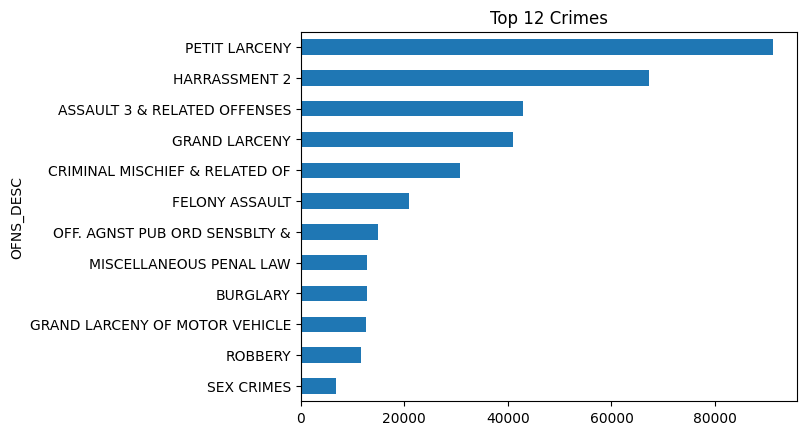

In [191]:
data.OFNS_DESC.value_counts().iloc[:12].sort_values().plot(kind="barh", title = "Top 12 Crimes")

In [192]:
data.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE',
       'JURIS_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PATROL_BORO', 'PREM_TYP_DESC', 'RPT_DT', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Latitude',
       'Longitude', 'days_duration', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

<Axes: title={'center': 'Numbers of crimes W.R.F Boroughs'}, ylabel='BORO_NM'>

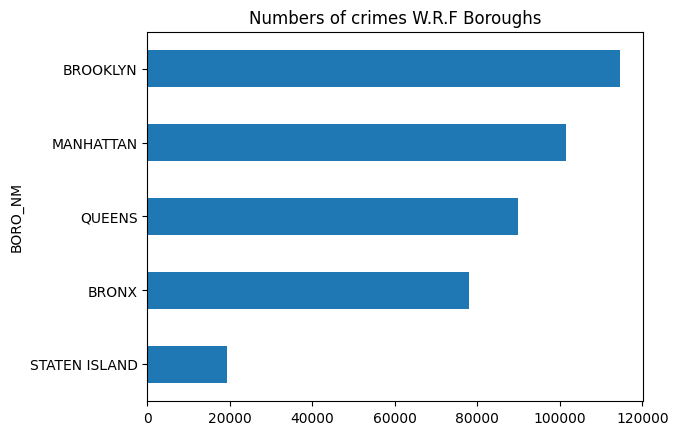

In [193]:
data['BORO_NM'].value_counts().sort_values().plot(kind="barh", title = "Numbers of crimes W.R.F Boroughs")

array([<Axes: ylabel='count'>], dtype=object)

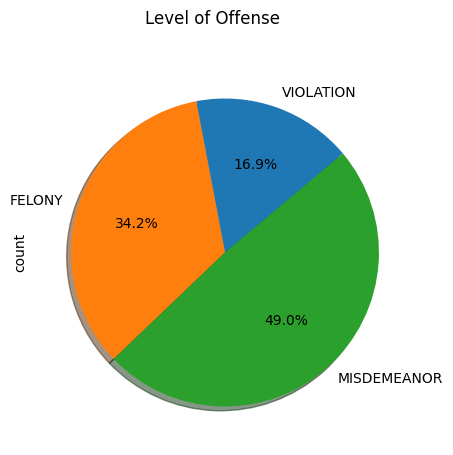

In [194]:
data['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

<Axes: title={'center': 'Days in which most crimes happened'}, ylabel='day'>

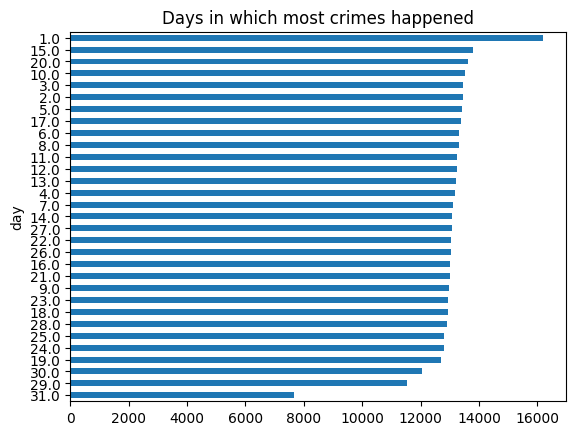

In [195]:
data['day'].value_counts().sort_values().plot(kind="barh", title = "Days in which most crimes happened")

<Axes: title={'center': 'Days in which most crimes happened'}, ylabel='month'>

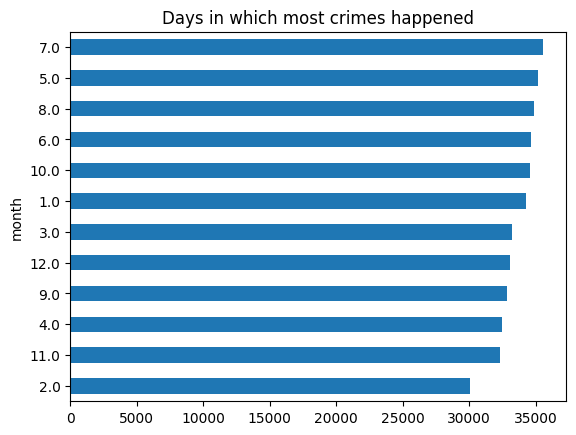

In [196]:
data['month'].value_counts().sort_values().plot(kind="barh", title = "Days in which most crimes happened")

# ENCODING, PREPARING DATA AND STANDARDIZATION

In [197]:
# features
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE',
       'JURIS_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PATROL_BORO', 'PREM_TYP_DESC', 'RPT_DT', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Latitude',
       'Longitude', 'days_duration', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [198]:
df.dtypes


CMPLNT_NUM                    object
ADDR_PCT_CD                  float64
BORO_NM                       object
CMPLNT_FR_DT          datetime64[ns]
CMPLNT_FR_TM          datetime64[ns]
CMPLNT_TO_DT          datetime64[ns]
CMPLNT_TO_TM          datetime64[ns]
CRM_ATPT_CPTD_CD              object
JURISDICTION_CODE              int64
JURIS_DESC                    object
LAW_CAT_CD                    object
LOC_OF_OCCUR_DESC             object
OFNS_DESC                     object
PATROL_BORO                   object
PREM_TYP_DESC                 object
RPT_DT                        object
SUSP_AGE_GROUP                object
SUSP_RACE                     object
SUSP_SEX                      object
VIC_AGE_GROUP                 object
VIC_RACE                      object
VIC_SEX                       object
Latitude                     float64
Longitude                    float64
days_duration        timedelta64[ns]
month                        float64
day                          float64
h

In [199]:
df1 = df.copy()

# Here Age group has noise converting NUll and dropping the noise

In [200]:
# take care of unvalid age data
valid_age = ['UNKNOWN', '25-44', '<18', '45-64', '65+', '18-24']
df1.loc[~df1['SUSP_AGE_GROUP'].isin(valid_age),'SUSP_AGE_GROUP'] = np.nan
df1.loc[~df1['VIC_AGE_GROUP'].isin(valid_age),'VIC_AGE_GROUP'] = np.nan

In [201]:
df1.SUSP_AGE_GROUP.value_counts()

SUSP_AGE_GROUP
UNKNOWN    216636
25-44      108481
45-64       38625
18-24       26262
<18          8300
65+          4727
Name: count, dtype: int64

In [202]:
df1.VIC_AGE_GROUP.value_counts()

VIC_AGE_GROUP
25-44      148498
UNKNOWN    103045
45-64       79130
18-24       33919
65+         23030
<18         15432
Name: count, dtype: int64

In [203]:
df1.isnull().sum()

CMPLNT_NUM            0
ADDR_PCT_CD           0
BORO_NM               0
CMPLNT_FR_DT          0
CMPLNT_FR_TM          0
CMPLNT_TO_DT          0
CMPLNT_TO_TM          0
CRM_ATPT_CPTD_CD      0
JURISDICTION_CODE     0
JURIS_DESC            0
LAW_CAT_CD            0
LOC_OF_OCCUR_DESC     0
OFNS_DESC             0
PATROL_BORO           0
PREM_TYP_DESC         0
RPT_DT                0
SUSP_AGE_GROUP       55
SUSP_RACE             0
SUSP_SEX              0
VIC_AGE_GROUP        32
VIC_RACE              0
VIC_SEX               0
Latitude              0
Longitude             0
days_duration         0
month                 0
day                   0
hour                  0
weekday               0
dtype: int64

In [204]:
# Dropping above null
df1.shape

(403086, 29)

In [205]:
df1.dropna(inplace=True)

In [206]:
df1.shape

(403000, 29)

In [207]:
df1.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE',
       'JURIS_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PATROL_BORO', 'PREM_TYP_DESC', 'RPT_DT', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Latitude',
       'Longitude', 'days_duration', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

# Here are converting categorical into label using label encode

In [208]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# apply le on categorical feature columns
df1['JURIS_DESC'] = le.fit_transform(df1['JURIS_DESC'])
df1['JURIS_DESC'].head(10)

11    8
13    8
14    8
16    8
17    8
18    8
19    8
20    8
21    8
22    8
Name: JURIS_DESC, dtype: int64

In [209]:
df1.shape

(403000, 29)

In [210]:
df1["OFNS_DESC"].value_counts()[:30]

OFNS_DESC
PETIT LARCENY                     91183
HARRASSMENT 2                     67290
ASSAULT 3 & RELATED OFFENSES      42966
GRAND LARCENY                     41050
CRIMINAL MISCHIEF & RELATED OF    30846
FELONY ASSAULT                    20903
OFF. AGNST PUB ORD SENSBLTY &     14916
MISCELLANEOUS PENAL LAW           12858
BURGLARY                          12725
GRAND LARCENY OF MOTOR VEHICLE    12539
ROBBERY                           11666
SEX CRIMES                         6883
DANGEROUS DRUGS                    5772
OFFENSES AGAINST PUBLIC ADMINI     4312
VEHICLE AND TRAFFIC LAWS           4077
THEFT-FRAUD                        3619
DANGEROUS WEAPONS                  3459
FRAUDS                             2116
CRIMINAL TRESPASS                  2018
FORGERY                            1653
UNAUTHORIZED USE OF A VEHICLE      1330
RAPE                               1231
POSSESSION OF STOLEN PROPERTY       927
INTOXICATED & IMPAIRED DRIVING      814
OFFENSES INVOLVING FRAUD      

In [211]:
counts_ofns = df1.groupby("OFNS_DESC")["OFNS_DESC"].transform(len)
df1['ofns_count'] = counts_ofns
df1 = df1.loc[df1['ofns_count']>1000]
df1 = df1.drop(columns = ['ofns_count'])


In [212]:
df1.shape

(395412, 29)

In [213]:
# apply le on categorical feature columns
df1['OFNS_DESC'] = le.fit_transform(df1['OFNS_DESC'])
df1.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,days_duration,month,day,hour,weekday
11,262794218,123.0,STATEN ISLAND,2023-02-01,2024-05-02 01:35:00,2023-02-01,2024-05-02 01:40:00,COMPLETED,0,8,...,45-64,UNKNOWN,M,40.547045,-74.220517,0 days,2.0,1.0,1,Wednesday
13,266228476,123.0,STATEN ISLAND,2023-04-02,2024-05-02 00:20:00,2023-04-02,2024-05-02 00:25:00,COMPLETED,0,8,...,45-64,WHITE,M,40.514779,-74.248458,0 days,4.0,2.0,0,Sunday
14,262909178,121.0,STATEN ISLAND,2023-02-02,2024-05-02 12:05:00,2023-02-02,2024-05-02 12:10:00,COMPLETED,0,8,...,45-64,WHITE,M,40.634491,-74.131551,0 days,2.0,2.0,12,Thursday
16,270654701,121.0,STATEN ISLAND,2023-07-01,2024-05-02 05:25:00,2023-07-01,2024-05-02 05:32:00,ATTEMPTED,0,8,...,25-44,BLACK,F,40.631010,-74.160384,0 days,7.0,1.0,5,Saturday
17,264963813,121.0,STATEN ISLAND,2023-03-10,2024-05-02 17:00:00,2023-03-11,2024-05-02 11:45:00,COMPLETED,0,8,...,25-44,WHITE HISPANIC,F,40.623188,-74.149238,1 days,3.0,10.0,17,Friday


In [214]:
# Use dummy variables to represent the crime descriptions
dummy3 = pd.get_dummies(df1['LOC_OF_OCCUR_DESC'],dtype='int')
# Take a look
dummy3.head()

,FRONT OF,INSIDE,OPPOSITE OF,REAR OF
11,0,1,0,0
13,1,0,0,0
14,0,1,0,0
16,1,0,0,0
17,0,1,0,0


In [215]:
df1 = pd.concat([df1, dummy3], axis=1).drop('LOC_OF_OCCUR_DESC', axis=1)
df1.head()


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,Longitude,days_duration,month,day,hour,weekday,FRONT OF,INSIDE,OPPOSITE OF,REAR OF
11,262794218,123.0,STATEN ISLAND,2023-02-01,2024-05-02 01:35:00,2023-02-01,2024-05-02 01:40:00,COMPLETED,0,8,...,-74.220517,0 days,2.0,1.0,1,Wednesday,0,1,0,0
13,266228476,123.0,STATEN ISLAND,2023-04-02,2024-05-02 00:20:00,2023-04-02,2024-05-02 00:25:00,COMPLETED,0,8,...,-74.248458,0 days,4.0,2.0,0,Sunday,1,0,0,0
14,262909178,121.0,STATEN ISLAND,2023-02-02,2024-05-02 12:05:00,2023-02-02,2024-05-02 12:10:00,COMPLETED,0,8,...,-74.131551,0 days,2.0,2.0,12,Thursday,0,1,0,0
16,270654701,121.0,STATEN ISLAND,2023-07-01,2024-05-02 05:25:00,2023-07-01,2024-05-02 05:32:00,ATTEMPTED,0,8,...,-74.160384,0 days,7.0,1.0,5,Saturday,1,0,0,0
17,264963813,121.0,STATEN ISLAND,2023-03-10,2024-05-02 17:00:00,2023-03-11,2024-05-02 11:45:00,COMPLETED,0,8,...,-74.149238,1 days,3.0,10.0,17,Friday,0,1,0,0


In [216]:
df["PREM_TYP_DESC"].value_counts()

PREM_TYP_DESC
RESIDENCE - APT. HOUSE        104789
STREET                         85605
RESIDENCE-HOUSE                42356
RESIDENCE - PUBLIC HOUSING     33820
CHAIN STORE                    26724
                               ...  
VIDEO STORE                       31
CEMETERY                          28
LOAN COMPANY                      21
TAXI/LIVERY (UNLICENSED)          21
AIRPORT TERMINAL                  18
Name: count, Length: 76, dtype: int64

In [217]:
df1['PREM_TYP_DESC'] = le.fit_transform(df1['PREM_TYP_DESC'])
df1.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,Longitude,days_duration,month,day,hour,weekday,FRONT OF,INSIDE,OPPOSITE OF,REAR OF
11,262794218,123.0,STATEN ISLAND,2023-02-01,2024-05-02 01:35:00,2023-02-01,2024-05-02 01:40:00,COMPLETED,0,8,...,-74.220517,0 days,2.0,1.0,1,Wednesday,0,1,0,0
13,266228476,123.0,STATEN ISLAND,2023-04-02,2024-05-02 00:20:00,2023-04-02,2024-05-02 00:25:00,COMPLETED,0,8,...,-74.248458,0 days,4.0,2.0,0,Sunday,1,0,0,0
14,262909178,121.0,STATEN ISLAND,2023-02-02,2024-05-02 12:05:00,2023-02-02,2024-05-02 12:10:00,COMPLETED,0,8,...,-74.131551,0 days,2.0,2.0,12,Thursday,0,1,0,0
16,270654701,121.0,STATEN ISLAND,2023-07-01,2024-05-02 05:25:00,2023-07-01,2024-05-02 05:32:00,ATTEMPTED,0,8,...,-74.160384,0 days,7.0,1.0,5,Saturday,1,0,0,0
17,264963813,121.0,STATEN ISLAND,2023-03-10,2024-05-02 17:00:00,2023-03-11,2024-05-02 11:45:00,COMPLETED,0,8,...,-74.149238,1 days,3.0,10.0,17,Friday,0,1,0,0


In [218]:
#Suspect and Victim demographic info

In [219]:
# Assign the new group
df_pca = df1[['SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX', 'VIC_AGE_GROUP','VIC_RACE','VIC_SEX']]
df_pca.head()

,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
11,25-44,BLACK,F,45-64,UNKNOWN,M
13,UNKNOWN,WHITE,U,45-64,WHITE,M
14,25-44,BLACK,M,45-64,WHITE,M
16,45-64,WHITE HISPANIC,M,25-44,BLACK,F
17,UNKNOWN,WHITE HISPANIC,M,25-44,WHITE HISPANIC,F


In [220]:
# Change UNKNOWN, E to np.Nan
print(df_pca['SUSP_SEX'].unique())
df_pca['SUSP_SEX'][df_pca['SUSP_SEX'] == 'U'] = np.nan

print(df_pca['SUSP_AGE_GROUP'].unique())
df_pca['SUSP_AGE_GROUP'][df_pca['SUSP_AGE_GROUP'] == 'UNKNOWN'] = np.nan

print(df_pca['SUSP_RACE'].unique())
df_pca['SUSP_RACE'][df_pca['SUSP_RACE'] == 'UNKNOWN'] = np.nan

print(df_pca['VIC_AGE_GROUP'].unique())
df_pca['VIC_AGE_GROUP'][df_pca['VIC_AGE_GROUP'] == 'UNKNOWN'] = np.nan

print(df_pca['VIC_RACE'].unique())
df_pca['VIC_RACE'][df_pca['VIC_RACE'] == 'UNKNOWN'] = np.nan

print(df_pca['VIC_SEX'].unique())
df_pca['VIC_SEX'][df_pca['VIC_SEX'] == 'E'] = np.nan
df_pca['VIC_SEX'][df_pca['VIC_SEX'] == 'D'] = np.nan

['F' 'U' 'M' 'UNKNOWN']
['25-44' 'UNKNOWN' '45-64' '<18' '18-24' '65+']


<ipython-input-220-e9fc92c1aac8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca['SUSP_SEX'][df_pca['SUSP_SEX'] == 'U'] = np.nan
<ipython-input-220-e9fc92c1aac8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca['SUSP_AGE_GROUP'][df_pca['SUSP_AGE_GROUP'] == 'UNKNOWN'] = np.nan


['BLACK' 'WHITE' 'WHITE HISPANIC' 'UNKNOWN' 'BLACK HISPANIC'
 'ASIAN / PACIFIC ISLANDER' 'AMERICAN INDIAN/ALASKAN NATIVE']
['45-64' '25-44' '65+' 'UNKNOWN' '<18' '18-24']


<ipython-input-220-e9fc92c1aac8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca['SUSP_RACE'][df_pca['SUSP_RACE'] == 'UNKNOWN'] = np.nan
<ipython-input-220-e9fc92c1aac8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca['VIC_AGE_GROUP'][df_pca['VIC_AGE_GROUP'] == 'UNKNOWN'] = np.nan


['UNKNOWN' 'WHITE' 'BLACK' 'WHITE HISPANIC' 'ASIAN / PACIFIC ISLANDER'
 'BLACK HISPANIC' 'AMERICAN INDIAN/ALASKAN NATIVE']
['M' 'F' 'D' 'E' 'L']


<ipython-input-220-e9fc92c1aac8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca['VIC_RACE'][df_pca['VIC_RACE'] == 'UNKNOWN'] = np.nan
<ipython-input-220-e9fc92c1aac8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca['VIC_SEX'][df_pca['VIC_SEX'] == 'E'] = np.nan
<ipython-input-220-e9fc92c1aac8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca['VIC_SEX'][df_pca['VIC_SEX'] == 'D'] = np.nan


In [221]:
#converting labels to numbers
df_pca_total = df_pca
total_null_vals= df_pca.isnull()
df_pca = df_pca.astype(str).apply(LabelEncoder().fit_transform)
df_pca.where(~total_null_vals, df_pca_total)

,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
11,1,2,0,2,NaN,2
13,NaN,4,NaN,2,4,2
14,1,2,1,2,4,2
16,2,5,1,1,2,0
17,NaN,5,1,1,5,0
...,...,...,...,...,...,...
555110,NaN,NaN,2,1,2,0
555111,0,2,1,1,2,0
555112,NaN,NaN,0,1,2,2
555113,1,1,1,2,1,2


In [222]:
# Fill Nan with median
df_pca = df_pca.fillna(df_pca.median())
df_pca.head()

,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
11,1,2,0,2,6,2
13,5,4,3,2,4,2
14,1,2,1,2,4,2
16,2,5,1,1,2,0
17,5,5,1,1,5,0


In [223]:
df1 = df1.drop(columns = ['SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX', 'VIC_AGE_GROUP','VIC_RACE','VIC_SEX'])
df1 = pd.concat([df1, df_pca], axis = 1)
df1.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,FRONT OF,INSIDE,OPPOSITE OF,REAR OF,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
11,262794218,123.0,STATEN ISLAND,2023-02-01,2024-05-02 01:35:00,2023-02-01,2024-05-02 01:40:00,COMPLETED,0,8,...,0,1,0,0,1,2,0,2,6,2
13,266228476,123.0,STATEN ISLAND,2023-04-02,2024-05-02 00:20:00,2023-04-02,2024-05-02 00:25:00,COMPLETED,0,8,...,1,0,0,0,5,4,3,2,4,2
14,262909178,121.0,STATEN ISLAND,2023-02-02,2024-05-02 12:05:00,2023-02-02,2024-05-02 12:10:00,COMPLETED,0,8,...,0,1,0,0,1,2,1,2,4,2
16,270654701,121.0,STATEN ISLAND,2023-07-01,2024-05-02 05:25:00,2023-07-01,2024-05-02 05:32:00,ATTEMPTED,0,8,...,1,0,0,0,2,5,1,1,2,0
17,264963813,121.0,STATEN ISLAND,2023-03-10,2024-05-02 17:00:00,2023-03-11,2024-05-02 11:45:00,COMPLETED,0,8,...,0,1,0,0,5,5,1,1,5,0


In [224]:
df1.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE',
       'JURIS_DESC', 'LAW_CAT_CD', 'OFNS_DESC', 'PATROL_BORO', 'PREM_TYP_DESC',
       'RPT_DT', 'Latitude', 'Longitude', 'days_duration', 'month', 'day',
       'hour', 'weekday', 'FRONT OF', 'INSIDE', 'OPPOSITE OF', 'REAR OF',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX'],
      dtype='object')

In [225]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395412 entries, 11 to 555116
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   CMPLNT_NUM         395412 non-null  object         
 1   ADDR_PCT_CD        395412 non-null  float64        
 2   BORO_NM            395412 non-null  object         
 3   CMPLNT_FR_DT       395412 non-null  datetime64[ns] 
 4   CMPLNT_FR_TM       395412 non-null  datetime64[ns] 
 5   CMPLNT_TO_DT       395412 non-null  datetime64[ns] 
 6   CMPLNT_TO_TM       395412 non-null  datetime64[ns] 
 7   CRM_ATPT_CPTD_CD   395412 non-null  object         
 8   JURISDICTION_CODE  395412 non-null  int64          
 9   JURIS_DESC         395412 non-null  int64          
 10  LAW_CAT_CD         395412 non-null  object         
 11  OFNS_DESC          395412 non-null  int64          
 12  PATROL_BORO        395412 non-null  object         
 13  PREM_TYP_DESC      395412 non-nul

#Here we are converting the COMPLT FR TM to hour and we already had same column 'day' with hour so we are checking whether both have equal values

In [226]:
df1['CMPLNT_FR_TM'] = (pd.to_datetime(df1['CMPLNT_FR_TM']).dt.hour)

In [227]:
df1['CMPLNT_FR_TM'].unique()

array([ 1,  0, 12,  5, 17,  8, 20,  9, 19, 21, 18,  7, 16,  6, 13, 14, 15,
       22, 10,  4,  3, 11, 23,  2], dtype=int32)

In [228]:
df1.hour.unique()

array([ 1,  0, 12,  5, 17,  8, 20,  9, 19, 21, 18,  7, 16,  6, 13, 14, 15,
       22, 10,  4,  3, 11, 23,  2], dtype=int32)

In [229]:
df1['CMPLNT_FR_TM'] = df1['CMPLNT_FR_TM'].fillna(df['CMPLNT_FR_TM'].median())

# Converting them into labels

In [230]:
#Target
df1['CRM_ATPT_CPTD_CD'] = le.fit_transform(df1['CRM_ATPT_CPTD_CD'])

In [231]:
df1['LAW_CAT_CD'] = le.fit_transform(df1['LAW_CAT_CD'])

# Here we standarization because the below columns has many numeric values so redefine the values around 0 and 1

In [232]:
# Here we standarization because the below columns has many numeric values so redefine the values around 0 and 1

df1['ADDR_PCT_CD'] =( df1['ADDR_PCT_CD'] - df1['ADDR_PCT_CD'].mean() ) / df1['ADDR_PCT_CD'].std()
df1['PREM_TYP_DESC'] =( df1['PREM_TYP_DESC'] - df1['PREM_TYP_DESC'].mean() ) / df1['PREM_TYP_DESC'].std()


#Dropping unrelated columns

In [233]:
df_final = df1[['ADDR_PCT_CD', 'JURIS_DESC', 'OFNS_DESC', 'PREM_TYP_DESC', 'LAW_CAT_CD', 'CMPLNT_FR_TM', 'FRONT OF', 'INSIDE', 'OPPOSITE OF', 'REAR OF', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']]

In [235]:
print(df_final.corr()["LAW_CAT_CD"][:])

ADDR_PCT_CD       0.030227
JURIS_DESC       -0.030777
OFNS_DESC         0.163899
PREM_TYP_DESC    -0.021639
LAW_CAT_CD        1.000000
CMPLNT_FR_TM      0.037449
FRONT OF         -0.072947
INSIDE            0.101937
OPPOSITE OF      -0.065560
REAR OF          -0.036336
SUSP_AGE_GROUP   -0.073485
SUSP_RACE        -0.118805
SUSP_SEX         -0.191954
VIC_AGE_GROUP    -0.080366
VIC_RACE         -0.080908
VIC_SEX          -0.154363
Name: LAW_CAT_CD, dtype: float64


# Modelling

In [236]:
od= pd.read_csv('NYPD.csv') # od = UNcleaned orginal data

In [237]:
print(pd.unique(od['LAW_CAT_CD']))
print (pd.value_counts(od['LAW_CAT_CD']))

['FELONY' 'MISDEMEANOR' 'VIOLATION']
LAW_CAT_CD
MISDEMEANOR    282419
FELONY         186740
VIOLATION       85958
Name: count, dtype: int64


In [238]:
df_final.shape

(395412, 16)

In [239]:
df_final['serious_crime'] = od['LAW_CAT_CD']
df_final['serious_crime'] = df_final['serious_crime'].map({'FELONY':'1',
                             'MISDEMEANOR':'1',
                             'VIOLATION':'0'},
                             na_action=None)




<ipython-input-239-85d14dec8135>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['serious_crime'] = od['LAW_CAT_CD']
<ipython-input-239-85d14dec8135>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['serious_crime'] = df_final['serious_crime'].map({'FELONY':'1',


In [245]:
df_serious_crime = df_final['serious_crime']
print (pd.unique(df_serious_crime))
print (pd.value_counts(df_serious_crime))

df_serious_crime = pd.to_numeric(df_serious_crime)
print(df_serious_crime.dtypes)
print (pd.unique(df_serious_crime))

# prepare features
features = list(df_final)
features.remove('serious_crime')
features.remove('LAW_CAT_CD')
print (features)

['1' '0']
serious_crime
1    327660
0     67752
Name: count, dtype: int64
int64
[1 0]
['ADDR_PCT_CD', 'JURIS_DESC', 'OFNS_DESC', 'PREM_TYP_DESC', 'CMPLNT_FR_TM', 'FRONT OF', 'INSIDE', 'OPPOSITE OF', 'REAR OF', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']


In [248]:
df_final[features].shape

(395412, 15)

# HERE WE ARE USING NAIVE BAYES BECASUE NAIVE PREDICTS ACCURATELY WHEN WE HAVE BOOLEAN PREDICTIONS LIKE YES OR NO, 1 OR 0. SO WE ARE USING NAIVE BAYES

In [249]:

from sklearn.model_selection import train_test_split
y = df_serious_crime
x = np.array(df_final[features])
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2)

In [250]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nbc = accuracy_score(y_test, y_pred_nb)
print('Accuracy = ', accuracy_nbc)
precision_nbc = precision_score(y_test,y_pred_nb,average="weighted")
print ('Precision = ', precision_nbc)
recall_nbc = recall_score(y_test,y_pred_nb,average="weighted")
print ('Recall = ', recall_nbc)
f1_score_nbc = f1_score(y_test,y_pred_nb,average="weighted")
print ('F1 Score = ', f1_score_nbc)

Accuracy =  0.9930452815396482
Precision =  0.993103145470564
Recall =  0.9930452815396482
F1 Score =  0.9929876526833379


[1 1 1 ... 0 1 1]
